Excercise 1

  - Using the imdb top 1000 movies dataset find the following
    - Get rid of useless columns
    - Oldest movie
    - Newest movie
    - Top 10 movies by IMDB rating
    - Top movie for each genre
    - Director with the most movies
    - Star with the most movies
    - Highest grossing movie for each genre
    - Lowest grossing movie for each director
    - Save the dataframe as a parquet file
    - Aggregate the gross revenue for all 1000 movies.

In [94]:
import pandas as pd
imdb = '/Users/kevinwu/Documents/Python/20240617-DE-TS-LectureMaterials/Python/Data/imdb_top_1000.csv'
df = pd.read_csv(imdb, thousands=',')

In [95]:

#Getting rid of useless columns

df.drop(columns = ['Poster_Link', 'Certificate', 'Certificate', 'Runtime',
'Overview', 'Meta_score', 'No_of_Votes'], inplace=True)
df

,Series_Title,Released_Year,Genre,IMDB_Rating,Director,Star1,Star2,Star3,Star4,Gross
0,The Shawshank Redemption,1994,Drama,9.3,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,28341469.0
1,The Godfather,1972,"Crime, Drama",9.2,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,134966411.0
2,The Dark Knight,2008,"Action, Crime, Drama",9.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,534858444.0
3,The Godfather: Part II,1974,"Crime, Drama",9.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,57300000.0
4,12 Angry Men,1957,"Crime, Drama",9.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,4360000.0
...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,"Comedy, Drama, Romance",7.6,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,NaN
996,Giant,1956,"Drama, Western",7.6,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,NaN
997,From Here to Eternity,1953,"Drama, Romance, War",7.6,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,30500000.0
998,Lifeboat,1944,"Drama, War",7.6,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,NaN


In [96]:
# Oldest movie

# CHANGES VALUES IN 'Released_Years' COLUMN TO NUMERIC, NaN IF NOT APPLICABLE
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors = 'coerce')
df.loc[df['Released_Year'] == df['Released_Year'].min(), ['Series_Title', 'Released_Year']]

,Series_Title,Released_Year
321,Das Cabinet des Dr. Caligari,1920.0


In [108]:
# Newest movie
df.loc[df['Released_Year'] == df['Released_Year'].max(), ['Series_Title', 'Released_Year']]

,Series_Title,Released_Year
18,Hamilton,2020.0
20,Soorarai Pottru,2020.0
205,Soul,2020.0
464,Dil Bechara,2020.0
612,The Trial of the Chicago 7,2020.0
613,Druk,2020.0


In [98]:
# Top 10 movies based on IMDB_Rating
df['IMDB_Rating'] = pd.to_numeric(df['IMDB_Rating'], errors = 'coerce')
df.sort_values('IMDB_Rating', ascending= False).iloc[0:10, [0, 3]]


,Series_Title,IMDB_Rating
0,The Shawshank Redemption,9.3
1,The Godfather,9.2
2,The Dark Knight,9.0
3,The Godfather: Part II,9.0
4,12 Angry Men,9.0
5,The Lord of the Rings: The Return of the King,8.9
6,Pulp Fiction,8.9
7,Schindler's List,8.9
10,The Lord of the Rings: The Fellowship of the Ring,8.8
11,Forrest Gump,8.8


In [99]:
# Top movie for each genre

df['Genre'] = df['Genre'].astype(str)
df['Genres'] = df['Genre'].str.split(', ')
temp = df.explode('Genres')

top_genre = temp.groupby(['Genres']).apply(lambda x: x.sort_values('IMDB_Rating', ascending=False).head(1), include_groups=False)
top_genre[['Series_Title', 'IMDB_Rating']]


,,Series_Title,IMDB_Rating
Genres,,,
Action,2,The Dark Knight,9.0
Adventure,5,The Lord of the Rings: The Return of the King,8.9
Animation,23,Sen to Chihiro no kamikakushi,8.6
Biography,7,Schindler's List,8.9
Comedy,19,Gisaengchung,8.6
Crime,1,The Godfather,9.2
Drama,0,The Shawshank Redemption,9.3
Family,23,Sen to Chihiro no kamikakushi,8.6
Fantasy,16,Star Wars: Episode V - The Empire Strikes Back,8.7


In [100]:



#df['Series_Title'].value_counts()

#temp = df.groupby('Director').agg({'Gross': 'sum', 'Series_Title': lambda x: x})
temp = df.groupby(['Released_Year']).agg(Gross=('Gross', 'max'), Movies=('Series_Title', lambda x: x)).sort_values('Gross', ascending=False)
temp
#temp5 = temp4.sort_values("IMDB_Rating", ascending=False)
#temp2.head(100)

#temp4.to_csv('output.txt', sep=' ', index=False)
#temp4



,Gross,Movies
Released_Year,,
2015.0,936662225.0,"[Talvar, Drishyam, Room, Inside Out, Spotlight..."
2019.0,858373000.0,"[Gisaengchung, Joker, Avengers: Endgame, 1917,..."
2009.0,760507625.0,"[3 Idiots, Inglourious Basterds, El secreto de..."
2018.0,678815482.0,"[Capharnaüm, Spider-Man: Into the Spider-Verse..."
1997.0,659325379.0,"[La vita è bella, Mononoke-hime, Good Will Hun..."
...,...,...
1920.0,NaN,Das Cabinet des Dr. Caligari
1922.0,NaN,Nosferatu
1932.0,NaN,"[Freaks, Scarface: The Shame of the Nation]"


In [101]:
# Director with the most movies

df['Director'] = df['Director'].astype(str)
df['Director'].value_counts().keys()[0]

'Alfred Hitchcock'

In [102]:
# Star with most movies SLOWER WAY
import time

start = time.time()
star_list = [df['Star1'], df['Star2'], df['Star3'], df['Star4']]
stars_sum = pd.Series()
for star in star_list:
    star = star.astype(str)
    stars_sum = stars_sum.add(star.value_counts(), fill_value=0)
print(stars_sum.sort_values(ascending=False).keys()[0])
print(time.time() - start)


Robert De Niro
0.01067805290222168


In [103]:
# Star with most movies FASTER WAY
start = time.time()
star_list = [df['Star1'], df['Star2'], df['Star3'], df['Star4']]
for star in star_list:
    star = star.astype(str)
print(pd.concat(star_list).value_counts().sort_values(ascending=False).keys()[0])
print(time.time() - start)

Robert De Niro
0.03304171562194824


In [104]:
# Highest grossing movie for each genre

temp = df.explode('Genres')
highest_gross_genre = temp.groupby('Genres').apply(lambda x: x.sort_values('Gross', ascending=False).head(1), include_groups=False)
highest_gross_genre[['Series_Title', 'Gross']].sort_values('Gross', ascending=False)


,,Series_Title,Gross
Genres,,,
Action,477,Star Wars: Episode VII - The Force Awakens,936662225.0
Adventure,477,Star Wars: Episode VII - The Force Awakens,936662225.0
Sci-Fi,477,Star Wars: Episode VII - The Force Awakens,936662225.0
Drama,59,Avengers: Endgame,858373000.0
Fantasy,623,Avatar,760507625.0
Romance,652,Titanic,659325379.0
Animation,891,Incredibles 2,608581744.0
Crime,2,The Dark Knight,534858444.0
Family,688,E.T. the Extra-Terrestrial,435110554.0


In [105]:
# Lowest grossing movie for each director

df['Gross'] = df['Gross'].fillna(0)
gross_director = df.groupby('Director').apply(lambda x: x.sort_values('Gross').head(1), include_groups=False)
gross_director.sort_values('Gross', ascending=False)[['Series_Title', 'Gross']]

,,Series_Title,Gross
Director,,,
Gareth Edwards,582,Rogue One,532177324.0
Josh Cooley,596,Toy Story 4,434038008.0
Roger Allers,43,The Lion King,422783777.0
Tim Miller,348,Deadpool,363070709.0
Byron Howard,330,Zootopia,341268248.0
...,...,...,...
Robert Hamer,449,Kind Hearts and Coronets,0.0
Robert Mulligan,180,To Kill a Mockingbird,0.0
Hal Ashby,541,Harold and Maude,0.0


In [106]:
# Save the dataframe as a parquet file

df.to_parquet('IMDB_List.parquet')


In [107]:
# Aggregate the gross revenue for all 1000 movies.

df['Gross'].sum()

np.float64(56536877976.0)

Excercise 2

 - DICOM Image Processor
      - [https://www.kaggle.com/competitions/osic-pulmonary-fibrosis-progression/overview]
      - Load a DICOM image into Python
      - Convert them into a gif
      - Use PILLOW
        

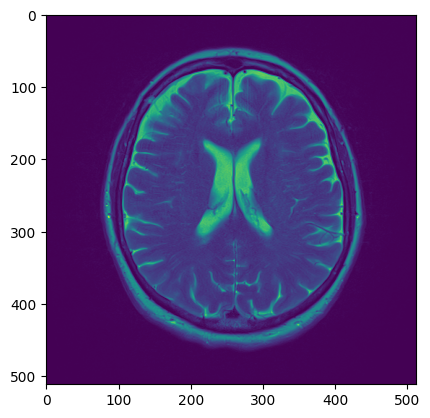

In [112]:
import pydicom as dicom
import matplotlib.pylab as plt

dicom_image = 'dicom_image.dcm'
ds = dicom.dcmread(dicom_image)
plt.imshow(ds.pixel_array)